In [50]:
library(dplyr)
library(ggplot2)

In [2]:
##### results from paper (Cuomo*, Seaton*, McCarthy* et al Nat Commun 2020)

In [3]:
# union of ips + mesendo + defendo eQTL (pseudobulk, expanded K)

In [4]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)

In [5]:
leads.ips$stage = "ips"
leads.mes$stage = "mesendo"
leads.defendo$stage = "defendo"

In [6]:
### combine results

In [7]:
leads = rbind(leads.ips, leads.mes, leads.defendo)

In [8]:
leads$ensembl_gene_id = gsub("_.*","",leads$feature)

In [9]:
head(leads,2)

beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,global_corr_p_value,chrom,pos,ref_allele,...,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,stage,ensembl_gene_id
-1.0048674,0.08005311,3.631688e-34,3.851118e-36,5_149826526_C_T,ENSG00000164587_RPS14,2.880363e-30,5,149826526,C,...,0.56508683,0.6296458,0.004683908,0.5159591,0.7734028,0.6450821,0.6001209,0.9876646,ips,ENSG00000164587
-0.9881017,0.08648823,2.432216e-26,3.147553e-30,11_57283988_C_T,ENSG00000134809_TIMM10,8.853960e-23,11,57283988,C,...,0.08194005,0.6897261,0.683497330,0.5137511,0.7877572,0.6064095,0.5419861,0.5654441,ips,ENSG00000134809


In [10]:
#### pick top SNP per gene (min p-value across stages)

In [11]:
nrow(leads)
leads = leads[order(leads$p_value),]
leads = leads[-which(duplicated(leads$feature)),]
nrow(leads)

[1] 32665

[1] 10788

In [12]:
input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/input_files/"
# write.csv(leads[,c("feature","chrom")], paste0(input_files_dir,"genes_tested.csv"))

In [13]:
# load all results sc stages (iPS, mesendo, defendo)
res.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/allresults.csv", row.names = 1)
res.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/allresults.csv", row.names = 1)
res.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/allresults.csv", row.names = 1)

In [14]:
res.ips$stage = "ips"
res.mes$stage = "mesendo"
res.defendo$stage = "defendo"

In [15]:
res = rbind(res.ips, res.mes, res.defendo)

In [16]:
res$ensembl_gene_id = gsub("_.*","",res$feature)

In [17]:
head(res,2)

beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,permutation_0,permutation_1,permutation_2,permutation_3,...,permutation_6,permutation_7,permutation_8,permutation_9,ensembl_gene_id,chrom,pos,ref_allele,alt_allele,stage
0.1034053,0.1156505,1,0.3712581,1_100712195_G_C,ENSG00000079335_CDC14A,0.4119083,0.02609394,0.6008147,0.1373799,...,0.1993281,0.2655322,0.9174491,0.8586736,ENSG00000079335,1,100712195,G,C,ips
0.1034053,0.1156505,1,0.3712581,1_100713300_G_T,ENSG00000079335_CDC14A,0.4119083,0.02609394,0.6008147,0.1373799,...,0.1993281,0.2655322,0.9174491,0.8586736,ENSG00000079335,1,100713300,G,T,ips


In [18]:
#### pick top eQTL per stage (min p-value across stages)

In [19]:
res$eqtl = paste0(res$feature,"-",res$snp_id)
nrow(res)

[1] 16059303

In [20]:
res = res[order(res$p_value),]
res = res[-which(duplicated(res$eqtl)),]
nrow(res)

[1] 5567940

In [21]:
##### CellRegMap association test

In [22]:
revision_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"
crm_file = paste0(revision_folder, "CRM_association/summary.csv")

In [51]:
crm = read.csv(crm_file, row.names=1)
colnames(crm) = c("feature_id", "n_snps", "feature_chromosome","p_value","snp_id","p_value_Bonferroni") 
nrow(crm)
head(crm,2)

[1] 10003258

,feature_id,n_snps,feature_chromosome,p_value,snp_id,p_value_Bonferroni
0,ENSG00000250462,909,17,0.5215900,17_28857239_G_A,1
1,ENSG00000250462,909,17,0.6535075,17_28857794_C_T,1


In [52]:
# number of genes
df0 = crm
length(unique(df0$feature_id))

[1] 10493

In [53]:
df = df0[order(df0$p_value),]
df = df[-which(duplicated(df$feature_id)),]

In [54]:
####################
#### merge

In [55]:
genes_new = as.character(unique(df0$feature_id))
genes_old = as.character(unique(res$ensembl_gene_id))

In [56]:
length(genes_old)
head(genes_old,2)

[1] 10788

[1] "ENSG00000163682" "ENSG00000226278"

In [57]:
length(genes_new)
head(genes_new,2)

[1] 10493

[1] "ENSG00000250462" "ENSG00000131558"

In [58]:
common_genes = genes_new[genes_new %in% genes_old]
length(common_genes)

[1] 10493

In [59]:
########## new leads & old results

In [60]:
df$ensembl_gene_id = df$feature_id

In [61]:
df1 = inner_join(df,res, by=c("ensembl_gene_id","snp_id"), suffix = c(".new",".old"))

In [62]:
nrow(df1)

[1] 4600

In [63]:
cor.test(-log10(df1$p_value.new),-log10(df1$p_value.old))


	Pearson's product-moment correlation

data:  -log10(df1$p_value.new) and -log10(df1$p_value.old)
t = 89.003, df = 4598, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7845814 0.8058203
sample estimates:
     cor 
0.795445 


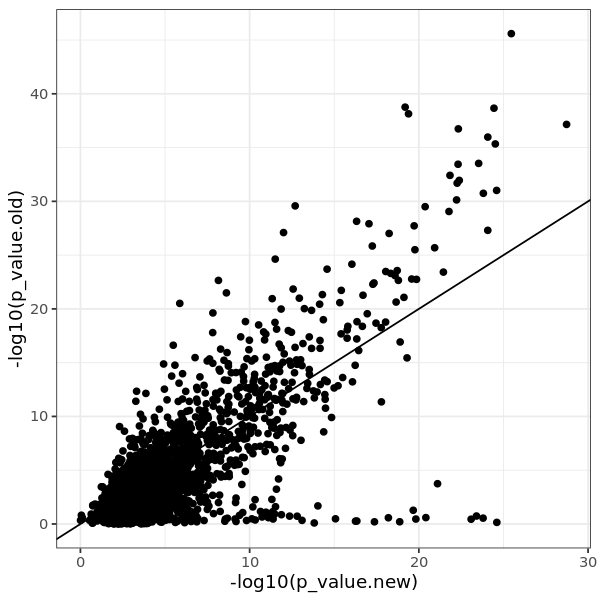

In [64]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(df1, aes(x=-log10(p_value.new),y=-log10(p_value.old))) + geom_point() + theme_bw() + geom_abline()

In [65]:
########## old leads & new results

In [66]:
df0$ensembl_gene_id = df0$feature_id
df2 = inner_join(df0,leads, by=c("ensembl_gene_id","snp_id"), suffix = c(".new",".old"))

In [67]:
nrow(df2)

[1] 10493

In [68]:
cor.test(-log10(df2$p_value.new),-log10(df2$p_value.old))


	Pearson's product-moment correlation

data:  -log10(df2$p_value.new) and -log10(df2$p_value.old)
t = 157.35, df = 10491, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8323037 0.8436953
sample estimates:
      cor 
0.8380908 


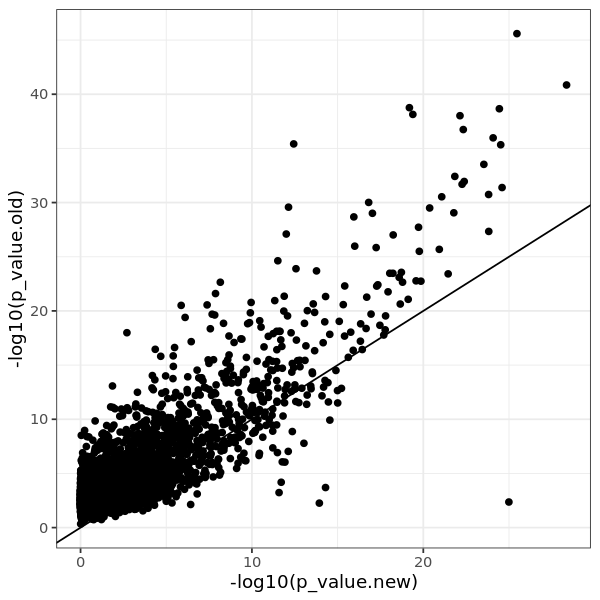

In [69]:
ggplot(df2, aes(x=-log10(p_value.new),y=-log10(p_value.old))) + geom_point() + theme_bw() + geom_abline()

In [70]:
########## old & new results

In [71]:
df3 = inner_join(df0,res, by=c("ensembl_gene_id","snp_id"), suffix = c(".new",".old"))

In [72]:
nrow(df3)

[1] 5413076

In [73]:
cor.test(-log10(df3$p_value.new),-log10(df3$p_value.old))


	Pearson's product-moment correlation

data:  -log10(df3$p_value.new) and -log10(df3$p_value.old)
t = 2829.5, df = 5413074, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7720667 0.7727463
sample estimates:
      cor 
0.7724067 


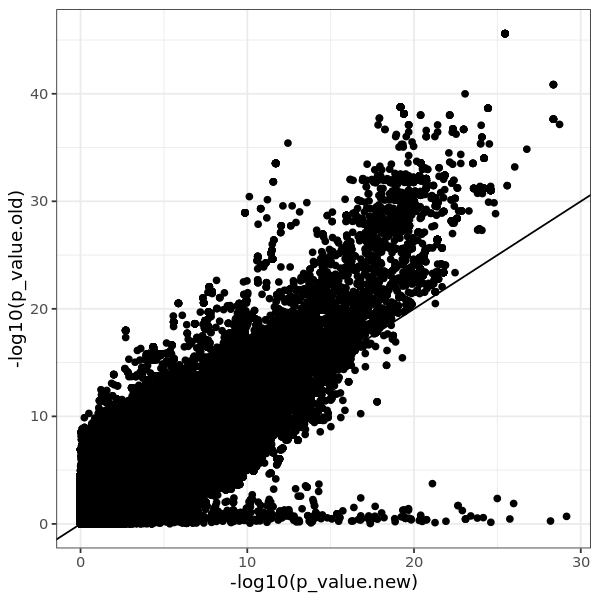

In [74]:
ggplot(df3, aes(x=-log10(p_value.new),y=-log10(p_value.old))) + geom_point() + theme_bw() + geom_abline()

In [75]:
unique(as.character(df3[-log10(df3$p_value.new)>15 & -log10(df3$p_value.old)<5,"feature_id"]))

[1] "ENSG00000105426" "ENSG00000181350" "ENSG00000109475" "ENSG00000119335"
 [5] "ENSG00000125691" "ENSG00000269028" "ENSG00000256618" "ENSG00000108953"
 [9] "ENSG00000089685" "ENSG00000142534" "ENSG00000008988" "ENSG00000125995"
[13] "ENSG00000166441" "ENSG00000118181" "ENSG00000131469" "ENSG00000168887"
[17] "ENSG00000086062" "ENSG00000172809" "ENSG00000143742"

In [76]:
df3[-log10(df3$p_value.new)>15 & -log10(df3$p_value.old)<5,
    c("feature_id","snp_id","p_value.new","p_value.old","feature")]

,feature_id,snp_id,p_value.new,p_value.old,feature
397102,ENSG00000105426,19_5181195_C_T,4.055903e-17,0.029758176,ENSG00000105426_PTPRS
397110,ENSG00000105426,19_5184684_C_T,1.864027e-16,0.061413976,ENSG00000105426_PTPRS
397127,ENSG00000105426,19_5189297_C_T,2.217907e-18,0.193563733,ENSG00000105426_PTPRS
397131,ENSG00000105426,19_5192372_C_G,3.851331e-21,0.255973340,ENSG00000105426_PTPRS
397276,ENSG00000105426,19_5233070_T_C,3.938237e-20,0.213547877,ENSG00000105426_PTPRS
650761,ENSG00000181350,17_16308654_G_A,6.310117e-19,0.264086023,ENSG00000181350_FAM211A
651024,ENSG00000181350,17_16411522_G_A,2.474478e-18,0.253063835,ENSG00000181350_FAM211A
692593,ENSG00000109475,4_109568463_G_A,5.226280e-18,0.366416765,ENSG00000109475_RPL34
692604,ENSG00000109475,4_109574357_G_A,8.134449e-24,0.359919847,ENSG00000109475_RPL34
692617,ENSG00000109475,4_109579798_C_T,5.208943e-18,0.181031465,ENSG00000109475_RPL34


In [77]:
fvf_filename = paste0(revision_folder,"fvf_new_outliers.csv")
write.csv(df3[-log10(df3$p_value.new)>15 & -log10(df3$p_value.old)<5,c("feature","snp_id")], fvf_filename)

In [76]:
df_beta = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)
head(df_beta)

,ENSG00000005059_CCDC109B_.4_110648632_T_A,ENSG00000006016_CRLF1_.19_18735221_G_T,ENSG00000006459_KDM7A_.7_139913409_G_A,ENSG00000013297_CLDN11_.3_170402765_T_C,ENSG00000021300_PLEKHB1_.11_73339784_G_A,ENSG00000029639_TFB1M_.6_155635808_C_G,ENSG00000033178_UBA6_.4_68480525_C_T,ENSG00000035115_SH3YL1_.2_256116_G_T,ENSG00000059377_TBXAS1_.7_139547370_G_A,ENSG00000063761_ADCK1_.14_78311319_G_A,...,ENSG00000248098_BCKDHA_.19_41937095_G_A,ENSG00000248124_RRN3P1_.16_21818292_A_C,ENSG00000250317_SMIM20_.4_25918516_A_G,ENSG00000253203_GUSBP3_.5_68922087_T_G,ENSG00000254184_TYW1B_.7_72200923_G_A,ENSG00000256018_HIST1H3G_.6_26198845_G_C,ENSG00000256073_C21orf119_.21_33728588_C_A,ENSG00000259024_TVP23C.CDRT4_.17_15434991_C_T,ENSG00000259803_SLC22A31_.16_89234110_G_C,ENSG00000267323_SLC25A1P5_.19_28298186_T_C
21843_1#10,-0.02336156,0.037167263,-0.029627685,0.18296979,-0.03793941,-0.029324411,0.031398501,-0.03962300,0.08013833,0.027498382,...,-0.08185803,-0.10862369,-0.10317566,-0.048543205,0.095111678,-0.002571070,-0.055608331,0.1931245,-0.06168149,0.054686251
21843_1#100,-0.04797379,-0.002567715,-0.050303678,0.14204539,-0.06425603,-0.017894114,-0.064683766,-0.08820444,0.23273882,0.040375905,...,-0.16133495,-0.45571807,-0.09858982,-0.095641305,0.007662211,-0.001386594,-0.094118770,0.2614240,-0.16271379,-0.037051849
21843_1#101,-0.01707154,-0.038323702,0.001072175,0.05068042,-0.04211749,-0.028163711,-0.079442257,-0.05854781,0.14245545,0.019225081,...,-0.08464140,-0.22917228,-0.08647358,-0.027566411,0.030433187,-0.038522875,-0.007152012,0.1489600,-0.08467373,-0.001068028
21843_1#102,-0.06849843,0.029141143,0.006591071,0.27772236,0.05210891,-0.039448204,0.002744249,-0.08783030,0.06083871,0.034590880,...,-0.05465162,-0.09382258,-0.12475134,-0.009728905,0.052761776,-0.008942713,-0.024298554,0.2108875,-0.06577307,0.020432219
21843_1#103,-0.02065975,0.017882432,-0.019780588,0.12713250,-0.04432031,-0.010911430,-0.024407791,-0.03931027,0.06883815,0.009218694,...,-0.04543236,-0.13128624,-0.06491895,-0.033262391,0.063575007,0.044047100,-0.037472203,0.1392061,-0.06160699,0.047756355
21843_1#105,0.03203034,0.029327187,-0.015424171,0.13315777,-0.03401761,-0.004702419,-0.075634975,-0.02003224,0.09548422,0.003292832,...,-0.08535482,-0.14593277,-0.07771164,-0.053617513,0.141638220,0.019637691,0.041395040,0.1576655,-0.03509197,0.113248113


In [81]:
grep("RPS11",colnames(df_beta))
grep("PTPRS",colnames(df_beta))

integer(0)

integer(0)